In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
import matplotlib.pyplot as plt

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, True)

# standardize
X0, mean_X0, std_X0 = standardize(X0)

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

samples with -999 are removed from the dataset 


# Build logistic regression model

In [13]:
# choose the features
ind_features = [12, 13, 1, 11, 22, 4, 19, 29]
X = X0#[:, ind_features]
print(X.shape)

# parameters
arg_lr = dict()
arg_lr['method'] = 'lr'
arg_lr['loss'] = 'logLikelihood'
arg_lr['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton'

(68114, 30)


# Try fitting

In [23]:
from build_poly import build_poly
from implementations import reg_logistic_regression

# input params 
degree = 1
lambda_ = 100
gamma = 1e-5
method = 'gd'

# build polynomial basis function
phi = build_poly(X, degree)

# optimization params
initial_w = np.zeros(phi.shape[1])
max_iters = 100000
thr=1e-1

# logistic regression
w_tot, loss_tot = reg_logistic_regression(y, phi, initial_w, max_iters, gamma, method, lambda_, thr)

100 :    508.125662112


KeyboardInterrupt: 

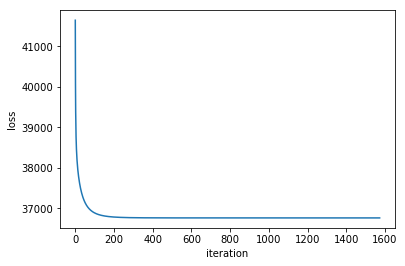

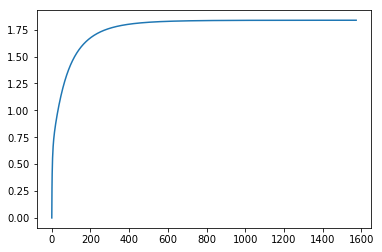

In [22]:
# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

norm_w_tot = []
for i in range(len(w_tot)):
    norm_w_tot.append(np.linalg.norm(w_tot[i]))

plt.figure()
plt.plot(norm_w_tot)
plt.show()


In [25]:
a= 'a'
print(a in ['a', 'b'])

True
